# Titanic Data Analysis 
## Badrinath Thirumalachari
### The main question we are trying to answer is, what factors made people more likely to survive?
#### Lets start by looking at the data set.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic_data.csv")

#lets take a peek into the data set
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Lets get some stats from the dataset

In [112]:
titanic_df.describe()

D:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To answer the question lets start by investigating the dataset. The best way to do that is to make some plots.

If we look at the dataset we see that we can still divide the group into Males and Females and see if sex was a factor in the survival.

Total Number of females:  314
Total Number of females survived:  233
Total Number of females didnt survive:  81
Total Number of males:  577
Total Number of males survived:  109
Total Number of males didnt survive:  468


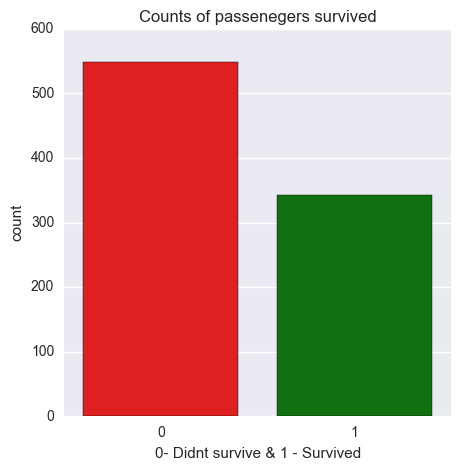

In [135]:
df = pd.pivot_table(data=titanic_df, index='Sex', values='PassengerId', columns='Survived', aggfunc='count')

print("Total Number of females: ", df.loc['female'][0] + df.loc['female'][1])
print("Total Number of females survived: ", df.loc['female'][1] )
print("Total Number of females didnt survive: ", df.loc['female'][0] )
print("Total Number of males: ", df.loc['male'][0] + df.loc['male'][1])
print("Total Number of males survived: ", df.loc['male'][1] )
print("Total Number of males didnt survive: ", df.loc['male'][0])
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=titanic_df,palette=['r','g'])
plt.title("Counts of passenegers survived")
plt.xlabel("0- Didn't survive & 1 - Survived")

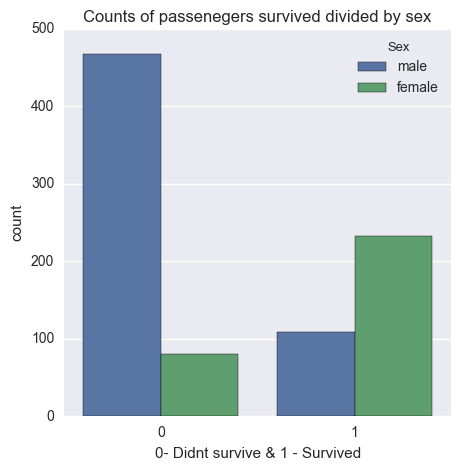

In [137]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',hue='Sex',data=titanic_df)
plt.title("Counts of passenegers survived seperated by sex")
plt.xlabel("0- Didn't survive & 1 - Survived")

I like to see the data in a pie chart as it will give me a better perspective. From the pie chart we can see that 74.2% of the female passengers survived and only 18.9% of the male passengers survived. We can plot the survival probability to be sure.

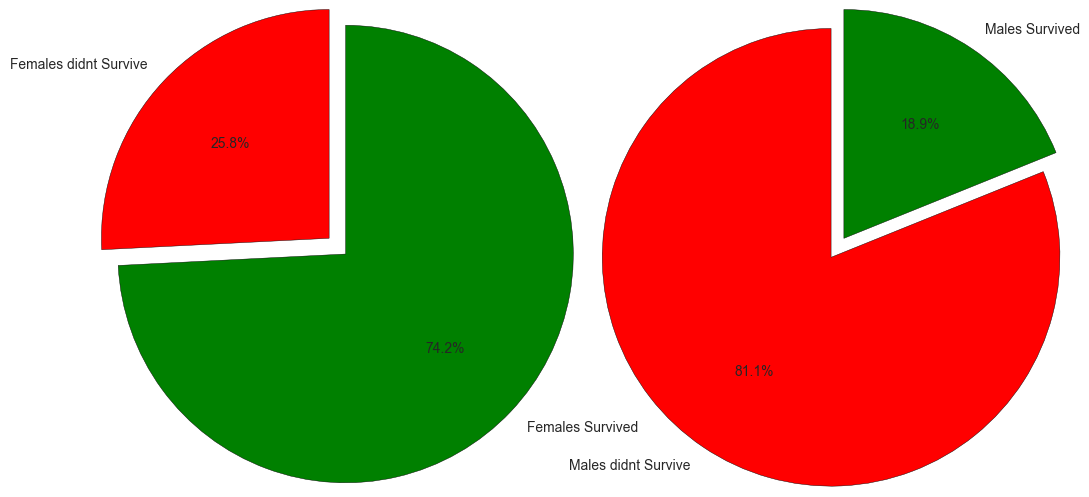

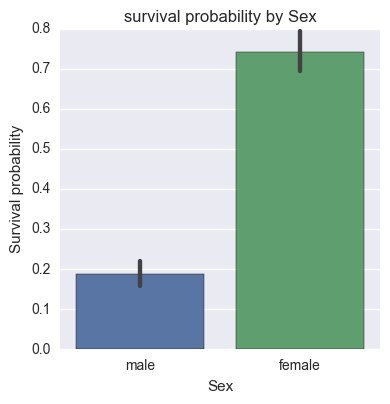

In [199]:
#plots 
fig = plt.figure(figsize=(10,10))
colors = ["r","g"]

ax1 = fig.add_subplot(221)
ax1.pie(df.loc['female'],labels=['Females didnt Survive','Females Survived'],shadow=False,colors=colors,explode=(0, 0.10),startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

ax2 = fig.add_subplot(222)
ax2.pie(df.loc['male'],labels=['Males didnt Survive','Males Survived'],shadow=False,colors=colors,explode=(0, 0.10),startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

plt.figure()
sns.factorplot(x="Sex", y="Survived", data=titanic_df, kind="bar")
plt.title("survival probability by Sex")
plt.ylabel("Survival probability")

Now we have to prove statistically that "Sex" was a factor in deciding if a person survived or not. Looking at the plot we can say that this is the case but we can also perform a hypothesis testing of two population proportions and cosider the people who survived.
Our hypothesis can be as follows:

| Sample size   | Propotions survived   | Sex  |
| ------------- |:-------------:| -----:|
| 314      | 74.5% | Female |
| 577      | 18.9% |   Male |

Let p<sub>1</sub> = Propotions of females survived

Let p<sub>2</sub> = Propotions of males survived

H<sub>0</sub>: p<sub>1</sub> - p<sub>2</sub> = 0 : No difference in the propotions : Null Hypothesis: Passenger's sex did not play a role in determining the survivability.

H<sub>A</sub>: p<sub>1</sub> - p<sub>2</sub> != 0 : Significant difference in the propotions : Alternate Hypothesis : Passenger's sex played an important role in determining the survivability.

Lets perform a two tailed test with a significance level of **.05**. I am using this [link](http://www.kean.edu/~fosborne/bstat/07d2pop.html) as reference to perform my calculations. 

The pooled estimate value (p) = .383

z-statistic value = +-16.3

For a two tailed test with an alpha value of **.05** with **.025** in each tail, the z<sub>critical</sub> value is **+-1.96**. Our z-statistic value is **+-16.3** which is greater then the z<sub>critical</sub> value. Hence we reject our null hypothesis. Passenger's sex was responsible in determining if a passenger survived.

Lets now investigate if the passenger's class was a variable that determined the survivability. It will be easy to perform a chi-square test on the grouped population and determine if the effect was random or not.

In [62]:
titanic_df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [60]:
survived_df_1 = titanic_df[titanic_df['Survived'] == 1]
survived_df_1.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,136,136,136,136,122,136,136,136,136,117,134
2,87,87,87,87,83,87,87,87,87,13,87
3,119,119,119,119,85,119,119,119,119,6,119


In [61]:
didnt_survive_df = titanic_df[titanic_df['Survived'] == 0]
didnt_survive_df.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,80,80,80,80,64,80,80,80,80,59,80
2,97,97,97,97,90,97,97,97,97,3,97
3,372,372,372,372,270,372,372,372,372,6,372


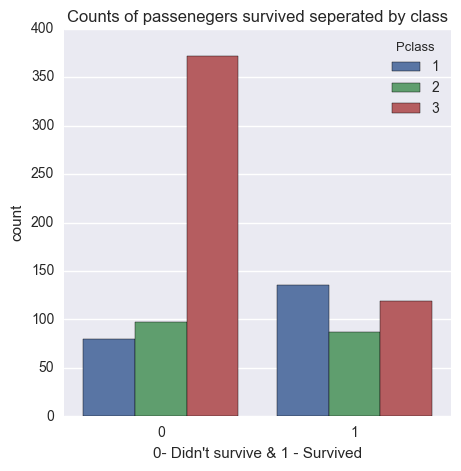

In [142]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',hue='Pclass',data=titanic_df)
plt.title("Counts of passenegers survived seperated by class")
plt.xlabel("0- Didn't survive & 1 - Survived")

In [70]:
print("Total Number of passengers in first class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[0] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[0])
print("Total Number of passengers in first class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[0] )
print("Total Number of passengers in second class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[1] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[1])
print("Total Number of passengers in second class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[1] )
print("Total Number of passengers in second class : ", didnt_survive_df.groupby("Pclass").count()['Survived'].iloc[2] + survived_df_1.groupby("Pclass").count()['Survived'].iloc[2])
print("Total Number of passengers in second class survived: ", survived_df_1.groupby("Pclass").count()['Survived'].iloc[2] )

Total Number of passengers in first class :  216
Total Number of passengers in first class survived:  136
Total Number of passengers in second class :  184
Total Number of passengers in second class survived:  87
Total Number of passengers in second class :  491
Total Number of passengers in second class survived:  119


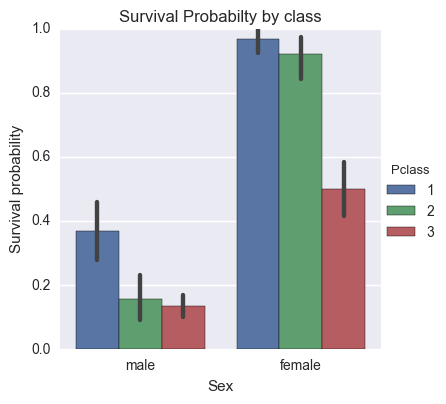

In [198]:
plt.figure()
sns.factorplot(x="Sex", y="Survived", hue="Pclass",data=titanic_df, kind="bar")
plt.title("Survival probabilty by class")
plt.ylabel("Survival probability")

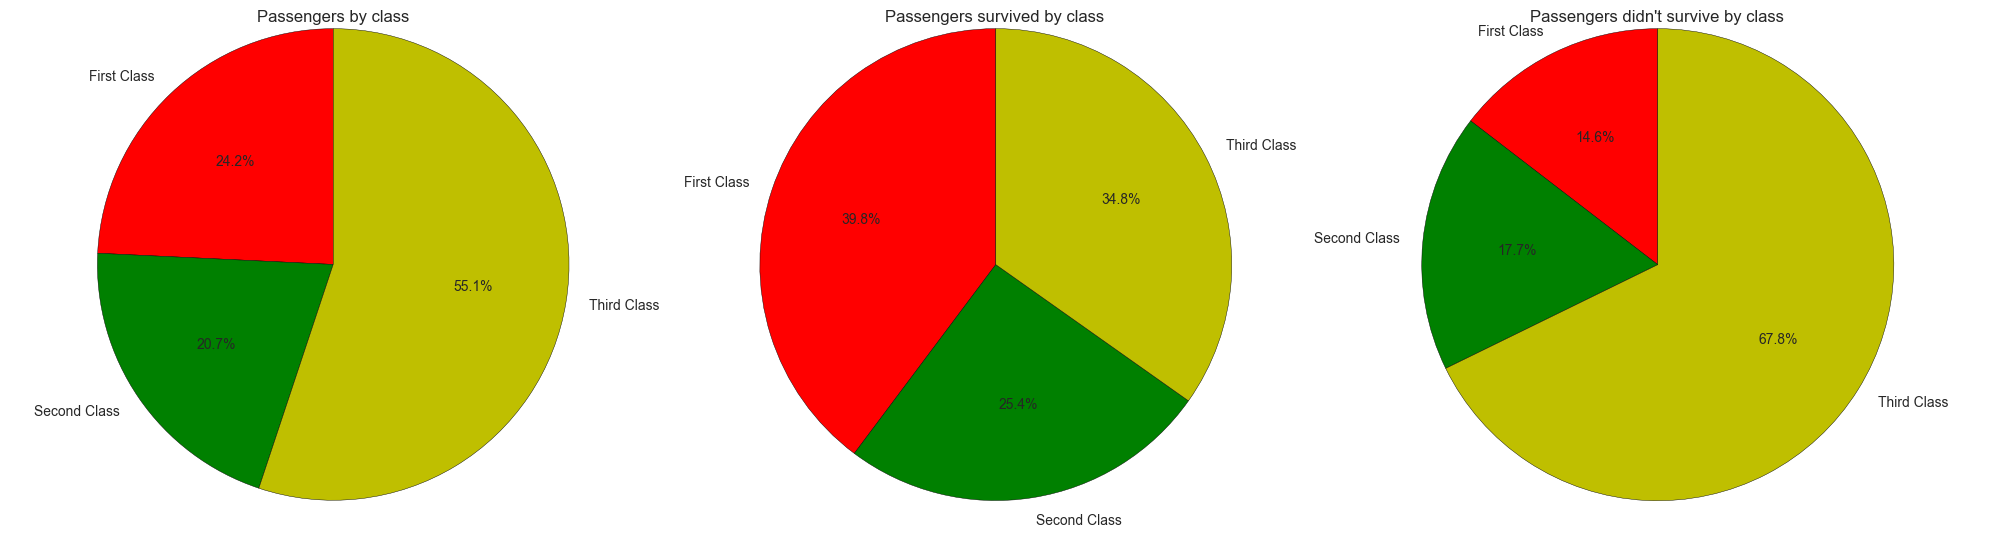

In [143]:
fig = plt.figure(figsize=(20,15))
colors = ["r","g", "y"]

ax1 = fig.add_subplot(331)
ax1.pie(titanic_df.groupby("Pclass").count()["Survived"],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax1.set_title("Passengers by class")
plt.axis('equal')
plt.tight_layout()

ax2 = fig.add_subplot(332)
ax2.pie(survived_df_1.groupby("Pclass").count()["Survived"],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax2.set_title("Passengers survived by class")
plt.axis('equal')
plt.tight_layout()

ax3 = fig.add_subplot(333)
ax3.pie(didnt_survive_df.groupby("Pclass").count()['Survived'],labels=['First Class','Second Class', 'Third Class'],shadow=False,colors=colors, startangle=90,autopct='%1.1f%%')
ax3.set_title("Passengers didn't survive by class")
plt.axis('equal')
plt.tight_layout()

Looking at the pie charts above it does look like of the passengers majority belonged to third class of which 67.8% didn't survive. Just to be sure we can perform a chi-squared test for these three propotions and decide if these events were independent or not random.
I have perfomed the chi-squared test in the excel sheet at this [link](https://github.com/lordbadri/Udacity_Data_Analyst_Nanodegree/blob/master/Project_2_titanic_data/chisqtest.xlsx). After performing the test we see that the significance level is less then **.001**. Hence we can say that these events were not random and class did determine if a passenger survived or not.

Lets now invesigate the age of the passengers and its role in the survivability of a passenger.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

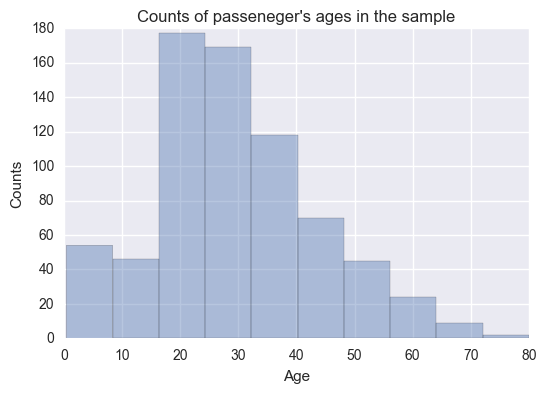

In [145]:
plt.figure()
sns.distplot(titanic_df['Age'].dropna(),kde=False,bins=10)
plt.title("Counts of passeneger's ages in the sample")
plt.ylabel("Counts")
titanic_df['Age'].dropna().describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

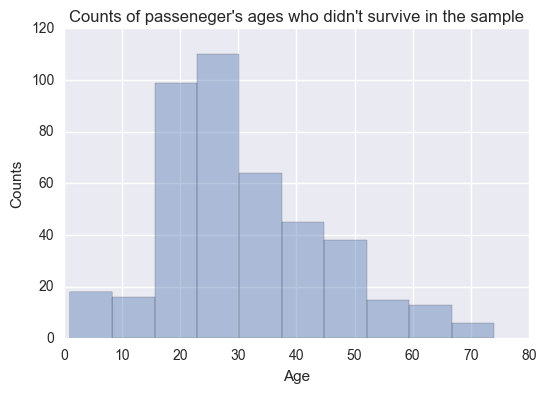

In [146]:
plt.figure()
sns.distplot(didnt_survive_df['Age'].dropna(),kde=False,bins=10)
plt.title("Counts of passeneger's ages who didn't survive in the sample")
plt.ylabel("Counts")
didnt_survive_df['Age'].dropna().describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

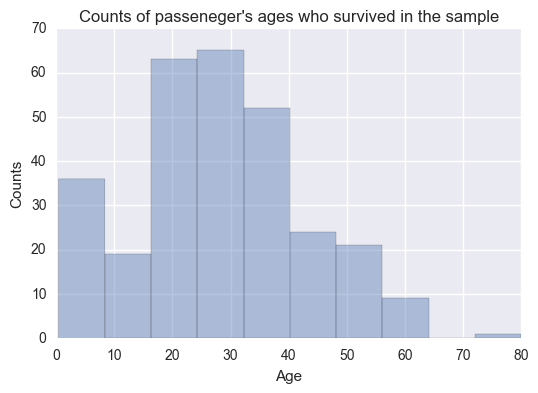

In [147]:
plt.figure()
sns.distplot(survived_df_1['Age'].dropna(),kde=False,bins=10)
plt.title("Counts of passeneger's ages who survived in the sample")
plt.ylabel("Counts")
survived_df_1['Age'].dropna().describe() 

From the plots above we can see that we have two kinds of distributions. The age of the passengers who survived and the passengers who didn't.

Our hypothesis can be as follows:

Let mu<sub>1</sub> = Mean age of the population that survived.

Let mu<sub>2</sub> = Mean age of the population that didn't survive.

H<sub>0</sub>: mu<sub>1</sub> - mu<sub>2</sub> = 0 : No difference in the mean ages of the population : Null Hypothesis: Passenger's age did not play a role in determining the survivability.

H<sub>A</sub>: mu<sub>1</sub> - mu<sub>2</sub> != 0 : Significant difference in the mean ages of the population : Alternate Hypothesis : Passenger's age played an important role in determining the survivability.

Lets perform a two tailed t-test with a significance level of **.05**. I am choosing a t-test over a z-test because we do not know anything about the population mean from which the sample was selected from and we cannot assume that the sample was selected from a population that is normally distributed.

From the sample we have the following information:

Let the X<sub>s</sub> and S<sub>s</sub> be the sample mean and standard deviation of the passengers ages that survived.

Let the X<sub>ds</sub> and S<sub>ds</sub> be the sample mean and standard deviation of the passengers ages that did not survived.


| Sample size   | Mean and Std of sample   | Type of passenger  |
| ------------- |:-------------:| -----:|
| 424      | 30.62 & 14.17 | Didn't survive |
| 290      | 28.34 & 14.95| Survived    |

From the above information we can calculate the standard error and t-statistic value.

Standard error S<sub>E</sub> = 1.115

t-statistic = +-2.046

I want to be sure so I will again perform a two tailed test with an alpha value of **.05** with **.025** in each tail, the t<sub>critical</sub> value is **+-1.96**. Our t-statistic value is **+-2.046** which is greater then the t<sub>critical</sub> value. Hence we reject our null hypothesis. Passenger's age was responsible in determining if a passenger survived. 

We can doulble check our calculation using this [link](http://www.quantitativeskills.com/sisa/statistics/t-test.htm) and looks like the calculations are on point. The p value is greater then alpha, hence we accept the null hypothesis.

This result is very close to the t<sub>critical</sub> vlaue and I am not convinced. This might ne due to the fact that off the 891 sample given to us 177 sample points have no value for the age. We can actually fill these values up by computing the mean age of the group of passengers divided by class and Sex, which pretty much gives an estimate fo the age.



In [168]:
temp_survived_df_1 = titanic_df[titanic_df['Survived'] == 1]
temp_didnt_survive_df_1 = titanic_df[titanic_df['Survived'] == 0]
titanic_df.groupby(["Pclass","Sex"]).describe()

Age        Fare       Parch  PassengerId  \
Pclass Sex                                                             
1      female count   94.000000   94.000000   94.000000    94.000000   
              mean    34.840426  106.125798    0.457447   469.212766   
              std     12.955925   74.259988    0.728305   247.476723   
              min      2.000000   25.929200    0.000000     2.000000   
              25%     24.000000   57.244800    0.000000   293.500000   
              50%     35.500000   82.664550    0.000000   447.000000   
              75%     42.750000  134.500000    1.000000   698.250000   
              max     63.000000  512.329200    2.000000   888.000000   
       male   count  122.000000  122.000000  122.000000   122.000000   
              mean    40.544426   67.226127    0.278689   455.729508   
              std     13.858594   77.548021    0.658853   247.026449   
              min      0.920000    0.000000    0.000000     7.000000   
              25%     33.250000   27.728100    0.000000   255.500000   
              50%     37.000000   41.262500    0.000000   480.500000   
              75%     49.000000   78.459375    0.000000   660.750000   
              max     80.000000  512.329200    4.000000   890.000000   
2      female count   76.000000   76.000000   76.000000    76.000000   
              mean    28.730263   21.970121    0.605263   443.105263   
              std     12.699984   10.891796    0.833930   243.627288   
              min      2.000000   10.500000    0.000000    10.000000   
              25%     22.750000   13.000000    0.000000   269.750000   
              50%     28.500000   22.000000    0.000000   439.500000   
              75%     36.000000   26.062500    1.000000   616.750000   
              max     57.000000   65.000000    3.000000   881.000000   
       male   count  108.000000  108.000000  108.000000   108.000000   
              mean    30.595648   19.741782    0.222222   447.962963   
              std     14.166305   14.922235    0.517603   256.922546   
              min      0.670000    0.000000    0.000000    18.000000   
              25%     23.000000   12.331250    0.000000   225.750000   
              50%     29.000000   13.000000    0.000000   416.500000   
              75%     36.000000   26.000000    0.000000   677.500000   
              max     70.000000   73.500000    2.000000   887.000000   
3      female count  144.000000  144.000000  144.000000   144.000000   
              mean    22.406250   16.118810    0.798611   399.729167   
              std     10.747535   11.690314    1.237976   267.232416   
              min      0.750000    6.750000    0.000000     3.000000   
              25%     18.000000    7.854200    0.000000   165.250000   
              50%     24.000000   12.475000    0.000000   376.000000   
              75%     26.000000   20.221875    1.000000   636.000000   
              max     63.000000   69.550000    6.000000   889.000000   
       male   count  347.000000  347.000000  347.000000   347.000000   
              mean    25.828300   12.661633    0.224784   455.515850   
              std     10.436999   11.681696    0.623404   261.921251   
              min      0.420000    0.000000    0.000000     1.000000   
              25%     21.000000    7.750000    0.000000   209.500000   
              50%     24.000000    7.925000    0.000000   466.000000   
              75%     30.000000   10.008300    0.000000   687.500000   
              max     74.000000   69.550000    5.000000   891.000000   

                          SibSp    Survived  
Pclass Sex                                   
1      female count   94.000000   94.000000  
              mean     0.553191    0.968085  
              std      0.665865    0.176716  
              min      0.000000    0.000000  
              25%      0.000000    1.000000  
              50%      0.000000    1.000000  
              75%      1.000000    1.000000  
             

Lets use the above data and write a function to fill out the NaN in out dataset for the age column. We want to fill in missing age data instead of just dropping the missing age data rows which inturn makes our sample even smaller.

In [181]:
def fill_missing_ages(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        if Pclass == 1 and Sex == "female":
            return 34.840426
        elif Pclass == 1 and Sex == "male":
            return 40.544426
        elif Pclass == 2 and Sex == "female":
            return 28.730263
        elif Pclass == 2 and Sex == "male":
            return 30.595648
        elif Pclass == 3 and Sex == "male":
            return 22.406250
        else:
            return 24.824684
    else:
        return Age
temp_df = titanic_df
temp_df['Age'] = titanic_df[['Age','Pclass','Sex']].apply(fill_missing_ages,axis=1)

Lets do the same analysis we performed for the age column in the dataset, but now with the dataset that has the NaN's in the age column filled in with a meaningful number. 

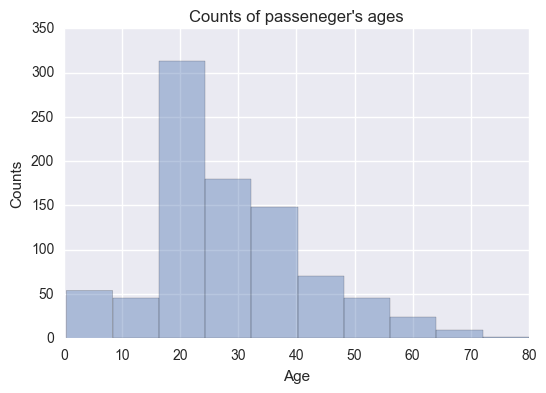

In [186]:
plt.figure()
sns.distplot(temp_df['Age'].dropna(),kde=False,bins=10)
plt.title("Counts of passeneger's ages")
plt.ylabel("Counts")

count    549.000000
mean      29.560109
std       12.778433
min        1.000000
25%       23.000000
50%       25.000000
75%       37.000000
max       74.000000
Name: Age, dtype: float64

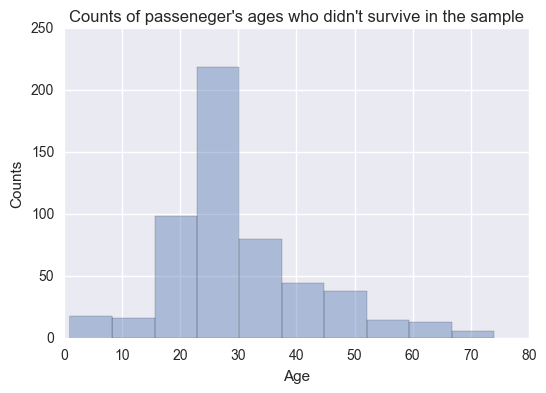

In [188]:
plt.figure()
sns.distplot(temp_didnt_survive_df_1['Age'].dropna(),kde=False,bins=10)
plt.title("Counts of passeneger's ages who didn't survive in the sample")
plt.ylabel("Counts")
temp_didnt_survive_df_1['Age'].describe() 

count    342.000000
mean      28.273889
std       13.942808
min        0.420000
25%       21.000000
50%       27.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

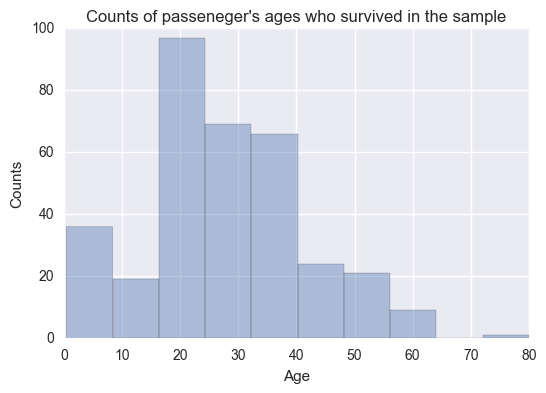

In [189]:
plt.figure()
sns.distplot(temp_survived_df_1['Age'].dropna(),kde=False,bins=10)
plt.title("Counts of passeneger's ages who survived in the sample")
plt.ylabel("Counts")
temp_survived_df_1['Age'].describe() 

Lets do some t-statistic analysis of the above data.

| Sample size   | Mean and Std of sample   | Type of passenger  |
| ------------- |:-------------:| -----:|
| 549      | 29.56 & 12.77 | Didn't survive |
| 342      | 28.27 & 13.94| Survived    |

From the above information we can calculate the standard error and t-statistic value.

Standard error S<sub>E</sub> = 0.93

t-statistic = +-1.386

I am performing a two tailed test with an alpha value of **.05** with **.025** in each tail, the t<sub>critical</sub> value is **+-1.96**. Our t-statistic value is **+-1.386** which is less then the t<sub>critical</sub> value. Hence we accept our null hypothesis. Passenger's age was not responsible in determining if a passenger survived.


We can do a similar analysis and determine if the "Fare" was a factor in determining the survivability of a passenger, I want to check if people who paid more survived.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

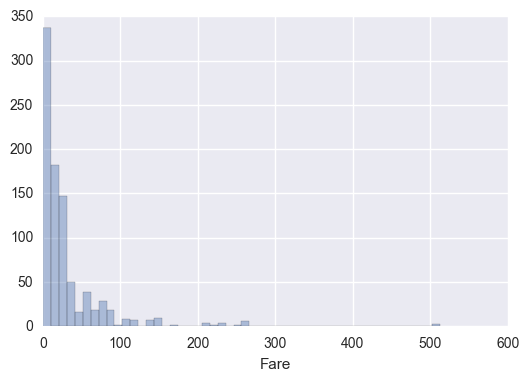

In [125]:
sns.distplot(titanic_df['Fare'].dropna(),kde=False,bins=50)
titanic_df['Fare'].dropna().describe() 

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

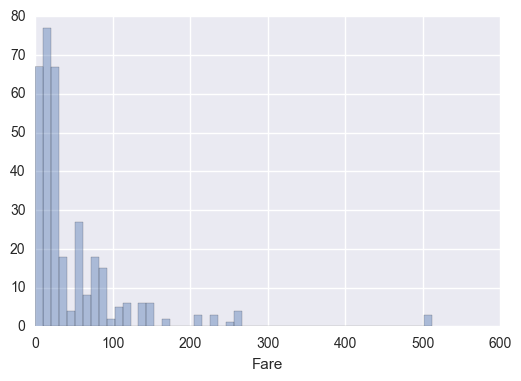

In [123]:
sns.distplot(survived_df_1['Fare'].dropna(),kde=False,bins=50)
survived_df_1['Fare'].dropna().describe() 

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

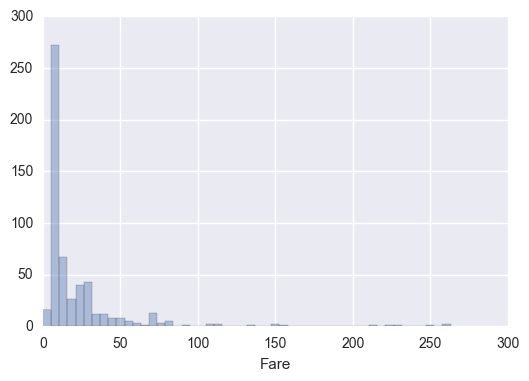

In [124]:
sns.distplot(didnt_survive_df['Fare'].dropna(),kde=False,bins=50)
didnt_survive_df['Fare'].dropna().describe()

From the plots above we can see that we have two positively skewed distributions. The fare distribution of the passengers who survived and the passengers who didn't.

Our hypothesis can be as follows:

Let mu<sub>1</sub> = Mean fare of the population that survived.

Let mu<sub>2</sub> = Mean fare of the population that didn't survive.

H<sub>0</sub>: mu<sub>1</sub> - mu<sub>2</sub> = 0 : No difference in the mean fare of the population : Null Hypothesis: Passenger's fare did not play a role in determining the survivability.

H<sub>A</sub>: mu<sub>1</sub> - mu<sub>2</sub> != 0 : Significant difference in the mean fare of the population : Alternate Hypothesis : Passenger's fare played an important role in determining the survivability.

Lets perform a two tailed t-test with a significance level of **.05**. I am choosing a t-test over a z-test because we do not know anything about the population mean from which the sample was selected from and we cannot assume that the sample was selected from a population that is normally distributed.

From the sample we have the following information:

Let the X<sub>s</sub> and S<sub>s</sub> be the sample mean and standard deviation of the passengers fares that survived.

Let the X<sub>ds</sub> and S<sub>ds</sub> be the sample mean and standard deviation of the passengers fares that did not survived.


| Sample size   | Mean and Std of sample   | Type of passenger  |
| ------------- |:-------------:| -----:|
| 549      | 22.12 & 31.39 | Didn't survive |
| 342      | 48.4 & 66.6| Survived    |

From the above information we can calculate the standard error and t-statistic value.

Standard error S<sub>E</sub> = 3.842

t-statistic = +-6.84

For a two tailed test with an alpha value of **.05** with **.025** in each tail, the t<sub>critical</sub> value is **+-1.96**. Our t-statistic value is **+-6.84** which is greater then the t<sub>critical</sub> value. Hence we reject our null hypothesis. Passenger's fare was not responsible in determining if a passenger survived.

This looks correct because the first class passengers who generally payed more for the fare had higher chances of survival, It can also be shown by doing a t-statistic test on the fare data like shown above.

We can doulble check our calculation using this [link](http://www.quantitativeskills.com/sisa/statistics/t-test.htm) and looks like the calculations are correct.

Lets just look at more information from the dataset. We can look at the passengers ages by class see if the passengers in first class were older.

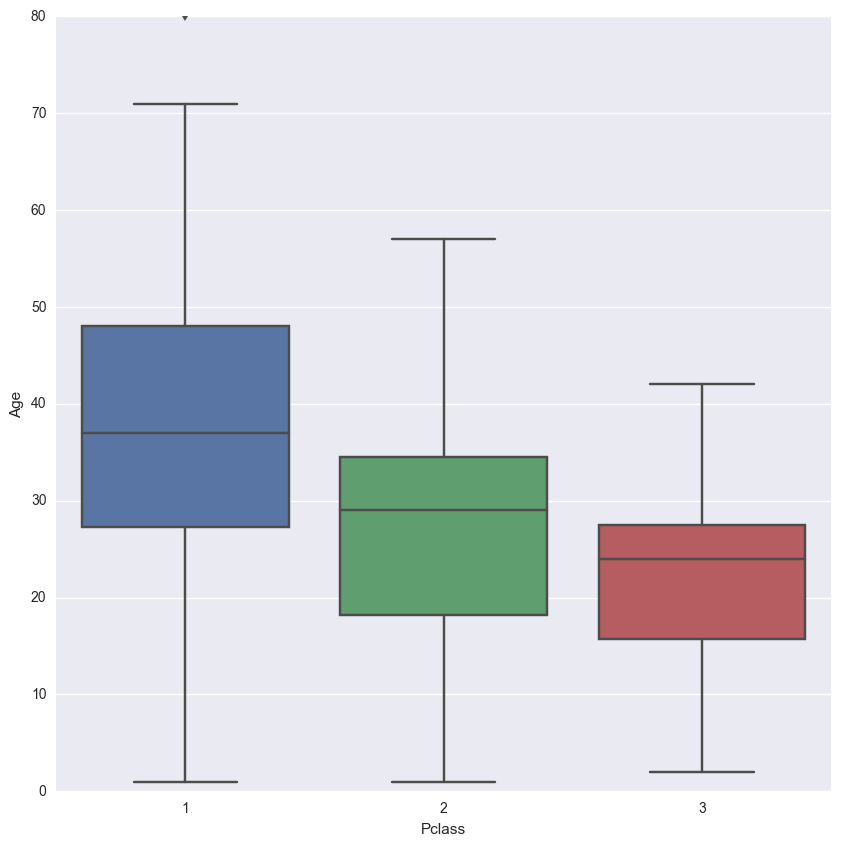

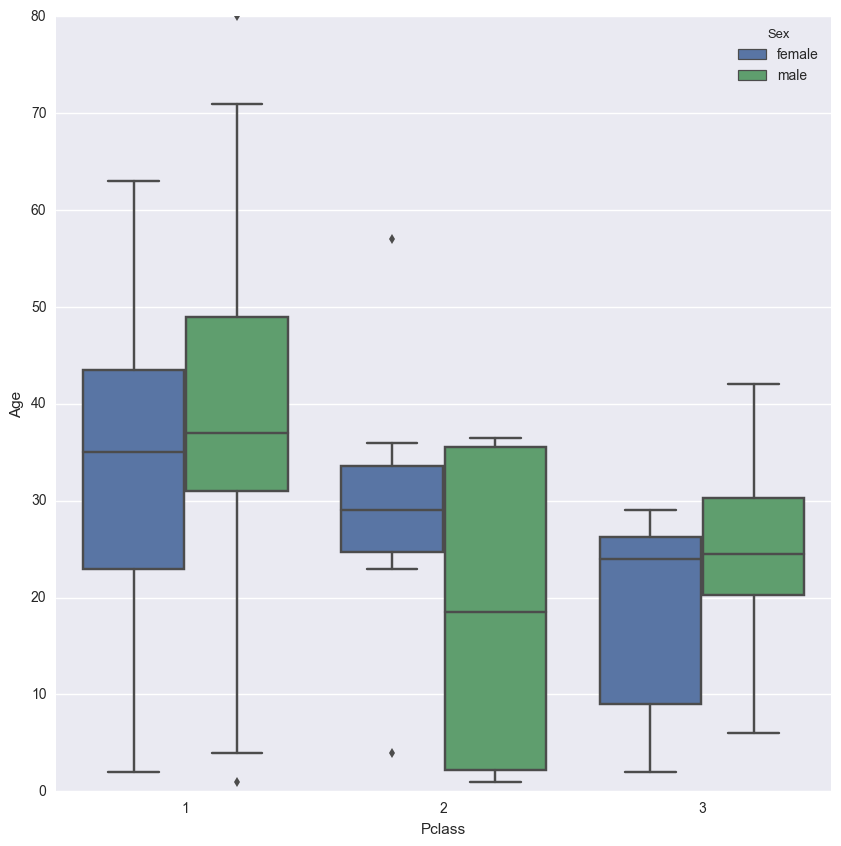

In [195]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=titanic_df.dropna())
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=titanic_df.dropna())

It looks like passengers were older in first class and the male passengers that belong to first class have the highest mean age.

# Conculsions

1. The Sex of the passenger palyed a really important role in deciding if the passenger survived. From watching the movie and doing some research online the protocol for evacuation was children and females first. The propotions z-test was clearly conculsive that sex of the passenger palyed a major role in determining the survivability.

2. The first class pasengers had a higher chance of survival compared to the passengers in third class, well this makes sense because the first class passengers stay above deck and are given priority during rescue. It can clearly be seen that the survivabilty is dependent on the class of the passenger and not independent from it from the chi-square test. 

3. The age of the passenger was not a factor in determining the survivability of the passenger as colcusive from the t-statistic tst performed on the data after filling in the NaN values with meaniful numbers.

4. The fare the passenger paid for the ticket did play a role on the survivability because first class passengers have higher survival rate and the fare is higher for the first class ticket on the ship. This is conclusive from the t-statistic test performed on the fare data.

# References

1. [https://enterprise.github.com/downloads/en/markdown-cheatsheet.pdf](https://enterprise.github.com/downloads/en/markdown-cheatsheet.pdf)

2. [https://www.medcalc.org/calc/comparison_of_proportions.php](https://www.medcalc.org/calc/comparison_of_proportions.php)

3. [http://seaborn.pydata.org/api.html](http://seaborn.pydata.org/api.html)

4. [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

5. [https://onlinecourses.science.psu.edu/stat200/node/61](https://onlinecourses.science.psu.edu/stat200/node/61)

6. [https://www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic)

7. [http://matplotlib.org/gallery.html](http://matplotlib.org/gallery.html)